# 穷举法

### y hat = wx

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 训练集
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [12]:
def forward(x):
    return x*w # 模型推理（即正向传播）

In [13]:
def loss(x, y):
    y_pred = forward(x) # 求y hat
    return (y_pred - y)**2 # 返回单个样本loss

In [14]:
# 穷举法
w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1): # 穷举参数w
    print("w=", w)
    
    # 求当前w的MSE
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data): 
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum/3)
    
    w_list.append(w)
    mse_list.append(l_sum/3)

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

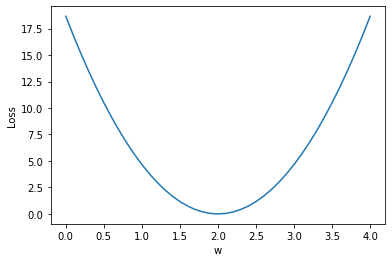

In [15]:
plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()  

### y hat = wx+b

[[0.  0.1 0.2 ... 3.8 3.9 4. ]
 [0.1 0.2 0.3 ... 3.9 4.  4.1]
 [0.2 0.3 0.4 ... 4.  4.1 4.2]
 ...
 [3.8 3.9 4.  ... 7.6 7.7 7.8]
 [3.9 4.  4.1 ... 7.7 7.8 7.9]
 [4.  4.1 4.2 ... 7.8 7.9 8. ]] 
--------------------------------
[[ 0.   0.2  0.4 ...  7.6  7.8  8. ]
 [ 0.1  0.3  0.5 ...  7.7  7.9  8.1]
 [ 0.2  0.4  0.6 ...  7.8  8.   8.2]
 ...
 [ 3.8  4.   4.2 ... 11.4 11.6 11.8]
 [ 3.9  4.1  4.3 ... 11.5 11.7 11.9]
 [ 4.   4.2  4.4 ... 11.6 11.8 12. ]] 
--------------------------------
[[ 0.   0.3  0.6 ... 11.4 11.7 12. ]
 [ 0.1  0.4  0.7 ... 11.5 11.8 12.1]
 [ 0.2  0.5  0.8 ... 11.6 11.9 12.2]
 ...
 [ 3.8  4.1  4.4 ... 15.2 15.5 15.8]
 [ 3.9  4.2  4.5 ... 15.3 15.6 15.9]
 [ 4.   4.3  4.6 ... 15.4 15.7 16. ]] 
--------------------------------


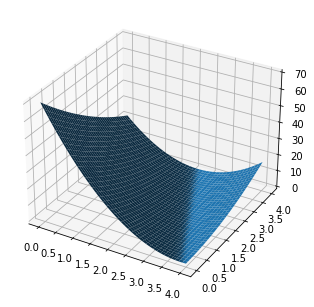

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#这里设函数为y=3x+2
x_data = [1.0,2.0,3.0]
y_data = [5.0,8.0,11.0]

def forward(x):
    return x * w + b # w和b都是41*41矩阵，相当于对于每一个（w，b）模型输入x得到的对应输出

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y) #得到该样本每个（w，b）的loss

mse_list = []
W=np.arange(0.0,4.1,0.1) # W和B的所有可能取值，即平面的两个轴
B=np.arange(0.0,4.1,0.1) 

[w,b]=np.meshgrid(W,B) 
# 用meshgrid生成平面的网格点，即：
# [[(W1,B1),(W2,B1),...,(W41,B1)],
#  [(W1,B2),(W2,B2),...,(W41,B2)],
#  ...
#  [(W1,B41),(W2,B41),...,(W41,B41)]]

# 用w存储meshgrid平面网格点矩阵的W值，b存储B值
# 即 w=[[W1,W2,...,W41],
#       [W1,W2,...,W41],
#       ...
#       [W1,W2,...,W41]]
# b同理

'''运用大量广播操作'''
l_sum = 0
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val) # 得到当前训练样本对于所有可能w，b取值的预测值
                                #（返回一个41*41的矩阵）
    print(y_pred_val,'\n--------------------------------')
    loss_val = loss(x_val, y_val)
    l_sum += loss_val

# l_sum/3 即是每个(w,b)模型的MSE，为41*41矩阵
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(w, b, l_sum/3)
plt.show()


# 梯度下降

predict (before training) 4 4.0
epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
epoch: 17 w= 

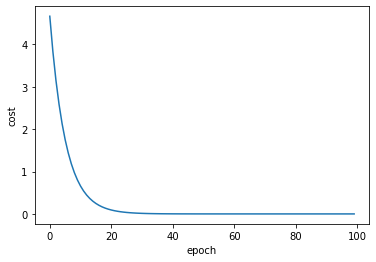

In [39]:
import matplotlib.pyplot as plt
 
# prepare the training set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
# initial guess of weight 
w = 1.0
 
# define the model linear model y = w*x
def forward(x):
    return x*w
 
#define the cost function MSE 
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)
 
# define the gradient function  gd
def gradient(xs,ys):
    grad = 0
    for x, y in zip(xs,ys):
        grad += 2*x*(x*w - y)
    return grad / len(xs)
 
epoch_list = []
cost_list = []
print('predict (before training)', 4, forward(4))
for epoch in range(100):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w-= 0.01 * grad_val  # 0.01 learning rate
    print('epoch:', epoch, 'w=', w, 'loss=', cost_val)
    epoch_list.append(epoch)
    cost_list.append(cost_val)
 
print('predict (after training)', 4, forward(4))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show() 

# 随机梯度下降

In [ ]:
import matplotlib.pyplot as plt
 
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = 1.0
 
def forward(x):
    return x*w
 
# calculate loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
# define the gradient function  sgd
def gradient(x, y):
    return 2*x*(x*w - y)
 
epoch_list = []
loss_list = []
print('predict (before training)', 4, forward(4))
for epoch in range(100):
    # 注意：每一个epoch意味着每一个样本的被考虑到了，所以这里的随机直接遍历了每一个样本
    for x,y in zip(x_data, y_data):
        grad = gradient(x,y)
        w = w - 0.01*grad    # update weight by every grad of sample of training set
        print("\tgrad:", x, y,grad)
        l = loss(x,y)
    print("progress:",epoch,"w=",w,"loss=",l)
    epoch_list.append(epoch)
    loss_list.append(l)
 
print('predict (after training)', 4, forward(4))
plt.plot(epoch_list,loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show() 